# Imbalanced data

In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import TomekLinks, RandomUnderSampler

import matplotlib.pyplot as plt
import seaborn as sns

Just a simple note:

In credit card fraud what should i be catering to?? 
- Should be that minority group and in that minority grp we want this model to be more precise as lots of false positives can be undesired by customers.
- Also the speed of detection is very crucial 

In [2]:
data = pd.read_csv('creditcard.csv')

data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
print(round(data['Class'].value_counts(normalize=True)*100,2))
print(data['Class'].value_counts())

Class
0    99.83
1     0.17
Name: proportion, dtype: float64
Class
0    284315
1       492
Name: count, dtype: int64


In [3]:
X = data.drop('Class', axis = 1)
y = data['Class']

In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold, train_test_split, GridSearchCV

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y)

In [11]:
logRegression = LogisticRegression()
grid = {
    'C': 10.0**np.arange(-2,3),
    'penalty':['l1','l2']
}

cv = KFold(n_splits=5, shuffle=False)

In [15]:
clf = GridSearchCV(logRegression, 
                   grid, 
                   cv=cv,
                   scoring = 'f1')

clf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1')

In [14]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[85261    38]
 [   47    97]]
0.9990051847430451
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.72      0.67      0.70       144

    accuracy                           1.00     85443
   macro avg       0.86      0.84      0.85     85443
weighted avg       1.00      1.00      1.00     85443



In [20]:
rf_classifier = RandomForestClassifier(n_jobs=-1)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [21]:
y_pred = rf_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[85289     6]
 [   29   119]]
0.9995903701883126
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.95      0.80      0.87       148

    accuracy                           1.00     85443
   macro avg       0.98      0.90      0.94     85443
weighted avg       1.00      1.00      1.00     85443



Increasing the class weight for the minority group.

In [23]:
class_weight = dict({
    0:1,
    1:100
})

In [24]:
rf_classifier = RandomForestClassifier(class_weight=class_weight,
                                       n_jobs=-1)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 100}, n_jobs=-1)

In [25]:
y_pred = rf_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[85289     6]
 [   31   117]]
0.9995669627705019
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.95      0.79      0.86       148

    accuracy                           1.00     85443
   macro avg       0.98      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



#### Under Sampling
- I am curious to see what values come out from this... because the train sample with be small and lose of data too. 

In [26]:
y_train.value_counts()

Class
0    199020
1       344
Name: count, dtype: int64

In [29]:
from collections import Counter
from imblearn.under_sampling import NearMiss

nm = NearMiss(sampling_strategy=0.8)
X_train_nm, y_train_nm = nm.fit_resample(X_train, y_train)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_nm)))

Original dataset shape Counter({0: 199020, 1: 344})
Resampled dataset shape Counter({0: 430, 1: 344})


In [30]:
rf_classifier = RandomForestClassifier(n_jobs=-1)
rf_classifier.fit(X_train_nm, y_train_nm)

RandomForestClassifier(n_jobs=-1)

In [31]:
y_pred = rf_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[75221 10074]
 [   10   138]]
0.8819797993984294
              precision    recall  f1-score   support

           0       1.00      0.88      0.94     85295
           1       0.01      0.93      0.03       148

    accuracy                           0.88     85443
   macro avg       0.51      0.91      0.48     85443
weighted avg       1.00      0.88      0.94     85443



I knew it, and this is most likely to the lose of data. 

#### Over sampling

In [32]:
nm = RandomOverSampler(sampling_strategy=0.5)
X_train_nm, y_train_nm = nm.fit_resample(X_train, y_train)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_nm)))

Original dataset shape Counter({0: 199020, 1: 344})
Resampled dataset shape Counter({0: 199020, 1: 99510})


In [33]:
rf_classifier = RandomForestClassifier(n_jobs=-1)
rf_classifier.fit(X_train_nm, y_train_nm)

RandomForestClassifier(n_jobs=-1)

In [35]:
y_pred = rf_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred, labels=[0, 1]))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, 
                            labels=[0, 1], 
                            target_names=['Normal', 'Fraud']))

[[85288     7]
 [   27   121]]
0.999602073897218
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     85295
       Fraud       0.95      0.82      0.88       148

    accuracy                           1.00     85443
   macro avg       0.97      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443



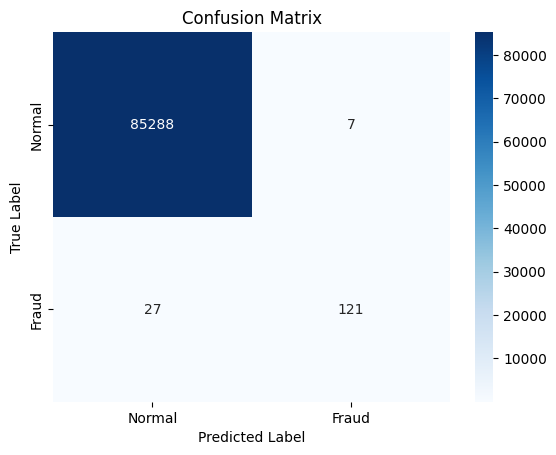

In [36]:
cm = confusion_matrix(y_test,y_pred, labels=[0, 1])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Incredible just by using RandomOversampler 

In [38]:
smote = SMOTE(sampling_strategy=0.8)
X_train_nm, y_train_nm = smote.fit_resample(X_train, y_train)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_nm)))

Original dataset shape Counter({0: 199020, 1: 344})
Resampled dataset shape Counter({0: 199020, 1: 159216})


In [39]:
rf_classifier = RandomForestClassifier(n_jobs=-1)
rf_classifier.fit(X_train_nm, y_train_nm)

RandomForestClassifier(n_jobs=-1)

In [40]:
y_pred = rf_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred, labels=[0, 1]))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, 
                            labels=[0, 1], 
                            target_names=['Normal', 'Fraud']))

[[85275    20]
 [   24   124]]
0.9994850368081645
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     85295
       Fraud       0.86      0.84      0.85       148

    accuracy                           1.00     85443
   macro avg       0.93      0.92      0.92     85443
weighted avg       1.00      1.00      1.00     85443



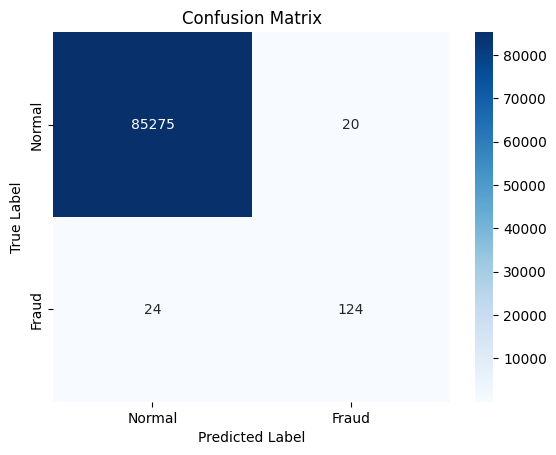

In [41]:
cm = confusion_matrix(y_test,y_pred, labels=[0, 1])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

This is alot better in catching the fraudulent activities

#### SMOTETomek

In [6]:
from imblearn.combine import SMOTETomek

In [12]:
smote = SMOTETomek(sampling_strategy=0.75, n_jobs = -1)
X_train_nm, y_train_nm = smote.fit_resample(X_train,y_train)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_nm)))

C:\Users\mayuo\anaconda3\envs\machineLearning\lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Original dataset shape Counter({0: 199020, 1: 344})
Resampled dataset shape Counter({0: 198254, 1: 148499})


In [13]:
rf_classifier = RandomForestClassifier(n_jobs=-1)
rf_classifier.fit(X_train_nm, y_train_nm)

RandomForestClassifier(n_jobs=-1)

In [14]:
y_pred = rf_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred, labels=[0, 1]))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, 
                            labels=[0, 1], 
                            target_names=['Normal', 'Fraud']))

[[85278    17]
 [   30   118]]
0.9994499256814484
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     85295
       Fraud       0.87      0.80      0.83       148

    accuracy                           1.00     85443
   macro avg       0.94      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443



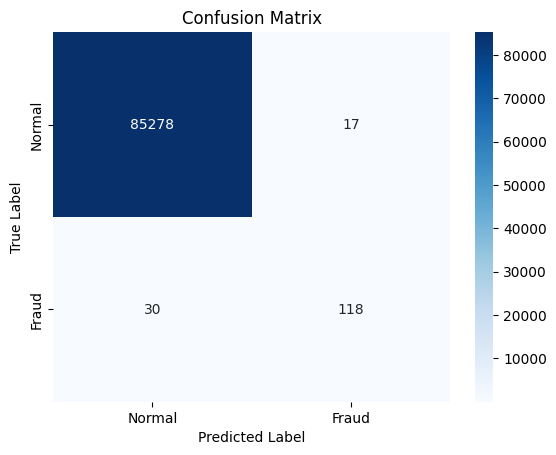

In [15]:
cm = confusion_matrix(y_test,y_pred, labels=[0, 1])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()